# Data Visualization

What? 
Visualization is a graphical summary about a data/findings. 

Why?
- Human brain is good in recognizing patterns in images than looking into raw data. 
- Excellent plots directly helps in making decisions
- Good visualization is not an easy task

How?
To visualize data, we are going to use a widely used data analytics package, **matplotlib**.

Matplotlib provides many different kinds of 2D and 3D plots that are useful for data analysis tasks. It offeres flexibility to create complex plots. 

Let's first try to understand the structure of matplotlib. It has mainly three layers. 

<AxesSubplot:xlabel='Age', ylabel='Fare'>

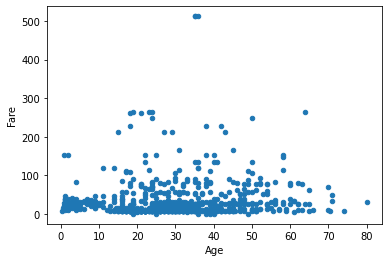

In [1]:
import pandas as pd
titanic = pd.read_csv('../data/titanic.csv')
titanic.plot.scatter('Age', 'Fare')
# What can you conclude from this visualization? 

Goal of Data Visualization: 
- to help your own understanding (for data exploration)
- to communicate or convey results 

## **Matplotlib Architecture**

### Backend Layer
Matplotlib has a backend which is responsible for rendering plots on screen or files. 

The jupyter notebook uses the inline backend to display the matplotlib on the browser. 
Although, we are not going to use the matplotlib backend object directly, but it is 
useful to know that the different kind of plot rendering requires different matplotlib backend.

This layer mainly has three abstract classes:
- FigureCanvas: defines the area on which the figure is drawn
- Renderer: it is the tool to draw on FigureCanvas
- Event: Handles user inputs such as keyboard strokes and mouse clicks

For more info, read [matplotlib backend](https://matplotlib.org/stable/users/explain/backends.html). 

In [2]:
%matplotlib inline

import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

### Artist Layer
Artist layer is composed of one object call **Artist**.<br>
_Everything that we see on a plot produced by matplotlib is an Artist instance_. <br>
Titles, lines, texts, axis labels are all instances of Artist class. 
**Figure** is the main Artist instance that holds everything together. Think of it as a container which holds the components of a plot together. Other containers are Subplot , Axes etc. 

Broadly, there are two types of Artist objects:
- primitive objects such as a Line2D and Rectangle
- collection objetcts such as PathCollection 

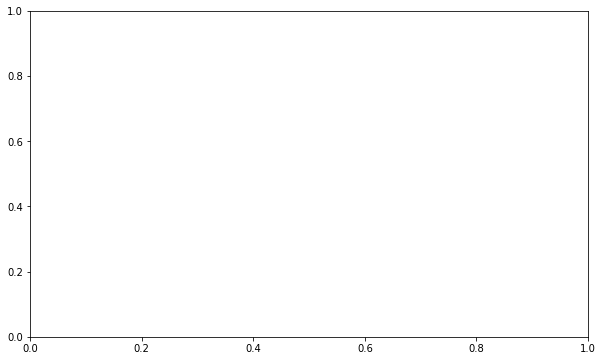

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 6)) # created a figure 
ax = fig.add_subplot(111) # inside figure container, contains the axes object

### Scripting Layer

This is the layer that we are most commonly going to work with. It is the matplotlib.pyplot interface. Thus, when we create plots with **plt** after the following command, scripting layer is what we play with. 

``import matplotlib.pyplot as plt``

Scripting layer stiches everything (Artist objects) together automatically, and thus is easier to use than the Artist layer. 

You can plot using either Artist layer objects (object-oriented style) or pyplot interface (pyplot style). 

In [4]:
### Basic plotting with Matplotlib

from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3, 2, '.')
canvas.print_png('test.png')

In [5]:
%%html
<img src = 'test.png' />

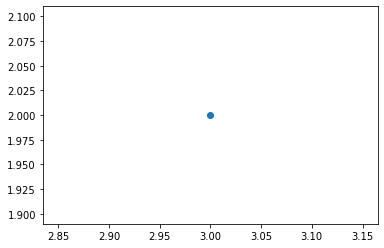

In [6]:
# the same thing can be done easily using Scripting layer

plt.figure() # gets the current figure object, or else create one Figure object
plt.plot(3, 2, 'o')


You can even access the Axes object of this Figure object, and can use the instances of Axes object such as axis ranges, or title, x-label, y-label etc to make modifications to the plot. 

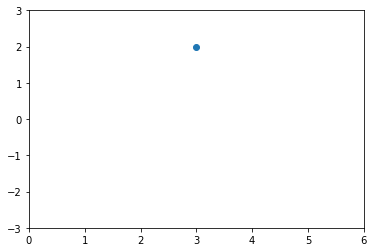

In [7]:
# For eg:
ax = plt.gca() # get current axes of the Figure object
ax.axis([0,6,-3,3]) # set x-axis from [0,6] and y-axis from [-3, 3]
ax.plot(3, 2, 'o')

#note: here how scripting layer, is interacting with the Artist layer objects Axes.

In [8]:
# you can also check the children that Axes object container is holding by :
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

### Scatterplots

Matplotlib provides different useful methods to plot data in various ways. We are going to cover some of the important ones here, namely, scatterplots, lineplots, barcharts, histograms, heatmaps, geographical data, etc. 

**Scatterplot** is a 2D plot of various data points. 

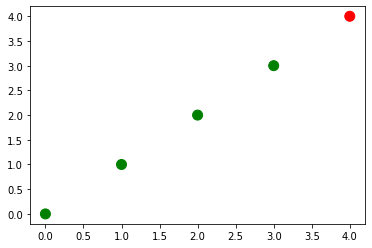

In [9]:
# For eg: 
import numpy as np
x = np.arange(0,5)
y = np.arange(0,5)

plt.figure()
plt.scatter(x, y)

# can add colors to these points:
colors = ['green'] * (len(x) - 1) + ['red']
plt.scatter(x, y, c = colors, s = 100) # c to assign color to data points, and s to increase size

# please read the documentation of plt.scatter to find what various parameters it can take

In [10]:
data = zip(x, y)
x, y = zip(*data)
x, y

((0, 1, 2, 3, 4), (0, 1, 2, 3, 4))

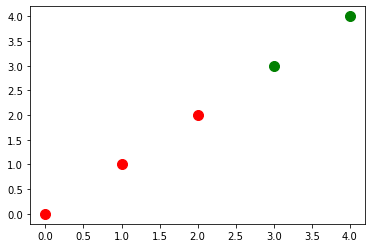

In [11]:
# You can plot points in the same plot using multiple scatterplots

plt.figure()
plt.scatter(x[:3], y[:3], c = 'red', s = 100)
plt.scatter(x[3:], y[3:], c = 'green', s = 100)

Text(0.5, 1.0, 'Some relationship')

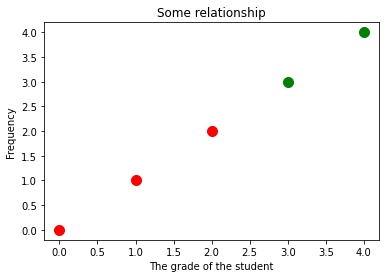

In [12]:
plt.figure()
plt.scatter(x[:3], y[:3], c = 'red', s = 100)
plt.scatter(x[3:], y[3:], c = 'green', s = 100)
plt.xlabel('The grade of the student')
plt.ylabel('Frequency ')
plt.title('Some relationship')

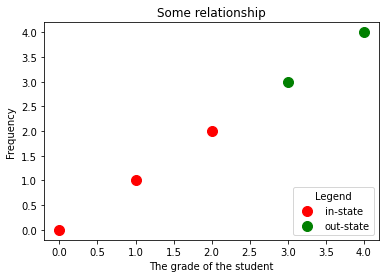

In [13]:
plt.figure()
plt.scatter(x[:3], y[:3], c = 'red', s = 100, label = 'in-state')
plt.scatter(x[3:], y[3:], c = 'green', s = 100, label = 'out-state')
plt.xlabel('The grade of the student')
plt.ylabel('Frequency ')
plt.title('Some relationship')
plt.legend(loc = 4, frameon=True, title='Legend')

### Line plots

It looks like scatterplots, but each data points are connected with a line. 

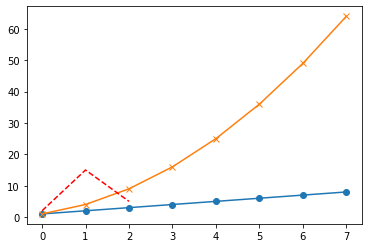

In [14]:
import numpy as np

data = np.arange(1, 9)
data_squared = data ** 2

plt.figure()
plt.plot(data, '-o')
plt.plot(data_squared, '-x')
plt.plot([2, 15, 5], '--r')

# create label and title and legend for this plot

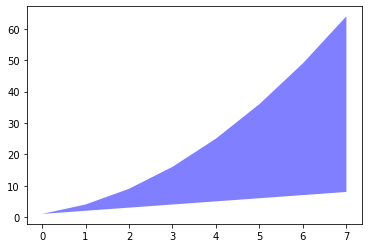

In [15]:
# you can also fill color between different line plots using fill_between function

plt.gca().fill_between(range(len(data)), data, data_squared, facecolor='blue', alpha=0.5)

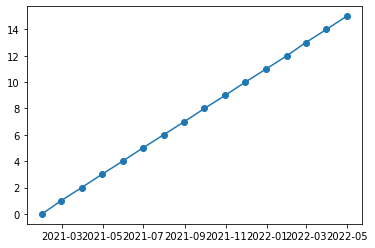

In [16]:
import pandas as pd

dates = pd.date_range('2021-01-09', '2022-05-03', freq='M')

x = np.arange(len(dates))
plt.plot(list(dates), x, '-o')

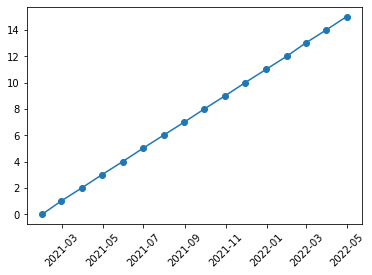

In [17]:
import pandas as pd

dates = pd.date_range('2021-01-09', '2022-05-03', freq='M')

x = np.arange(len(dates))
plt.plot(list(dates), x, '-o')

ax = plt.gca() # get the Axes object
xaxis = ax.xaxis # with Axes object, get the XAxis object

for item in xaxis.get_ticklabels(): # get all xaxis labels 
    item.set_rotation(45) # rotate the text
    

In [18]:
### Bar charts

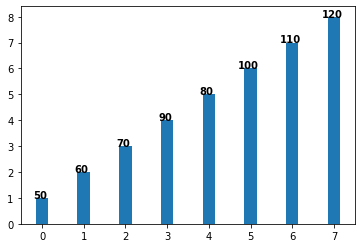

In [34]:
data = np.arange(1, 9)
data_squared = data ** 2

plt.figure()
xvals = range(len(data))
plt.bar(xvals, data, width=0.3)

text = [50, 60, 70, 90, 80, 100, 110, 120]
i = 0
for item in plt.gca().get_children()[0: 8]:
    
    plt.text(item.get_x() + 0.1, item.get_height(), str(text[i]) , weight = 'bold', ha='center')
    i+=1

<BarContainer object of 8 artists>

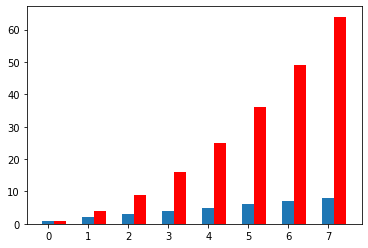

In [35]:
data = np.arange(1, 9)
data_squared = data ** 2

plt.figure()
xvals = range(len(data))
plt.bar(xvals, data, width=0.3)

new_xvals = []
for item in xvals:
    new_xvals.append(item + 0.3)
    
plt.bar(new_xvals, data_squared, width = 0.3, color = 'red')

<BarContainer object of 8 artists>

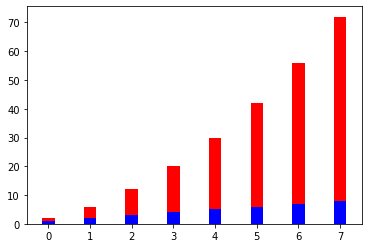

In [21]:
# you can even plot stacked bar 
plt.figure()
xvals = range(len(data))
plt.bar(xvals, data, width = 0.3, color = 'b')
plt.bar(xvals, data_squared, width = 0.3, color = 'r', bottom = data)

<BarContainer object of 8 artists>

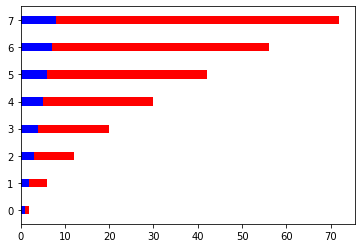

In [22]:
# you can also plot horizontal bar plots using barh

plt.figure()
xvals = range(len(data))
plt.barh(xvals, data, height = 0.3, color = 'b')
plt.barh(xvals, data_squared, height = 0.3, color = 'r', left = data)

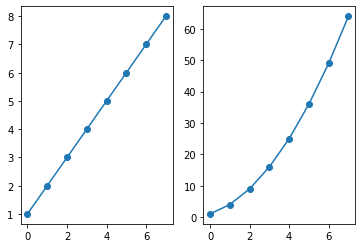

In [23]:
# Subplots

#Sometimes you would like to plot two plots side by side to compare between them. 

plt.figure()
plt.subplot(1, 2, 1)

plt.plot(data, '-o')
#plt.plot(data_squared, '-o')

plt.subplot(1, 2, 2)
plt.plot(data_squared, '-o')

# this is confusing and misleading
# use same y axis


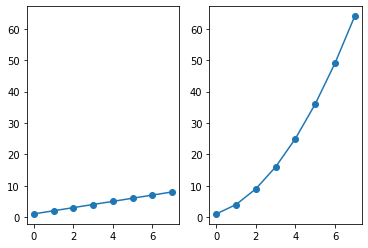

In [24]:
# Subplots

#Sometimes you would like to plot two plots side by side to compare between them. 

plt.figure()
ax1 = plt.subplot(1, 2, 1)

plt.plot(data, '-o')
#plt.plot(data_squared, '-o')

plt.subplot(1, 2, 2, sharey = ax1)
plt.plot(data_squared, '-o')

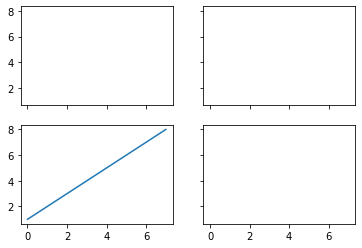

In [25]:
# You can also create grid of subplot

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True, sharey = True)
ax3.plot(data)

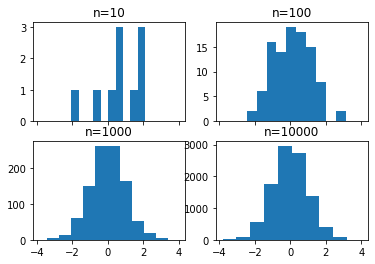

In [26]:
# Histograms
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex = True)
axs = [ax1, ax2, ax3, ax4]


sample_size = [10, 100, 1000, 10000]
for i in range(len(sample_size)):
    samples = np.random.normal(loc = 0.0, scale = 1.0, size = sample_size[i])
    axs[i].hist(samples) # with no bins
    axs[i].set_title('n={}'.format(sample_size[i]))
    

In [27]:
# Box plots

df = pd.read_csv('../data/titanic.csv')

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fb39926b580>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fb39951b8b0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fb39926bbe0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fb39926bfa0>}

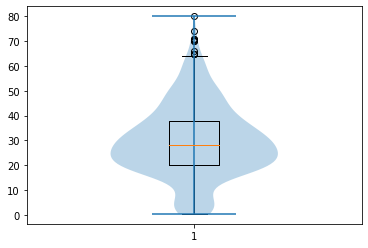

In [28]:
plt.figure()
plt.boxplot(df['Age'].dropna())
plt.violinplot(df['Age'].dropna())

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fb399284a60>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fb399290ac0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fb399255970>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fb399255d30>}

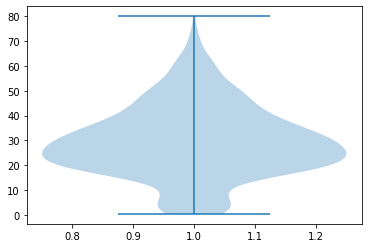

In [29]:
plt.violinplot(df['Age'].dropna())

In [30]:
# Heatmap

df = df.dropna()

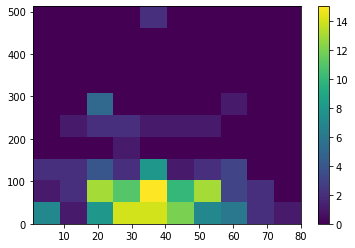

In [31]:
plt.figure()
_ = plt.hist2d(df['Age'], df['Fare'], bins = 10)
_ = plt.colorbar()

# Visualizing Amounts or Proportions

## *Bar plots*

When one of the axis represent categories and the other represents counts of it or proportion of it then, you may use bar plots. 

<img src="images/bar1.png" alt="drawing" width="500"/>
<img src="images/bar2.png" alt="drawing" width="500"/>

If the categories are nominal, then you should sort it. However, if the categories are ordinal, then don't do it.


<img src="images/bar4.png" alt="drawing" width="400"/>     <img src="images/bar5.png" alt="drawing" width="400"/>   

If the axis labels are long, the you can swap the axis, in that case, your bar plot will be horizontal.

<img src="images/bar3.png" alt="drawing" width="500"/>

* All bar plots should start with 0 *

<img src="images/bar_0.png" alt="drawing" width="400"/> <img src="images/bar_1.png" alt="drawing" width="400"/>

If possible then try to reduce ink for non-data elements in the plots. 

<img src="images/bar9.png" alt="drawing" width="400"/> <img src="images/tips6.png" alt="drawing" width="400"/>

### _Grouped and stacked bars_
<img src="images/bar6.png" alt="drawing" width="500"/>
<img src="images/bar7.png" alt="drawing" width="500"/>
<img src="images/bar8.png" alt="drawing" width="500"/>


*If shaded region is used to represent numerical values, then the area of the shaded region should be proportional to the numerical value*

*If values are in different magnitude, then plotting them into log-scale or square-root scale is a good idea.*
<img src="images/dot1.png" alt="drawing" width="400"/> <img src="images/dot3.png" alt="drawing" width="400"/>

*If the bars are too long then try to use dot plots. 

<img src="images/dots1.png" alt="drawing" width="300"/>

- Only stack upto two bars together only 
- Some  other ways to visualizing proportions are stacked densities (read further).
- For nested proportions, you may use mosaic plots, tree maps or parallel sets. (read further)

Example of stacked densities:

<img src="images/dens5.png" alt="drawing" width="400"/>

<img src="images/dens6.png" alt="drawing" width="300"/>


Finally, you can also use heatmaps to represent amounts, especially when you have 2 categories, along x and y, and value along z-axis, in that case, the values are represented as colors. 

<img src="images/heat1.png" alt="drawing" width="400"/>

# Visualizing Distributions

If you are interested to know how the values in a particular column is distributed, you can use histogram. 
Histograms y-axis represents the counts of the values that fall within certain range (called bins) along x-axis. 
It can also be used to represent the empirical probability distribution by setting the value of y-axis from 0 to 1, in that case, the y-axis can be treated as probability values. In matplotlib, you can do this by setting the parameter ``normed = True``. 

<img src="images/hist1.png" alt="drawing" width="400"/>
<img src="images/hist2.png" alt="drawing" width="400"/>

Histogram plots can be used as representation of the data, but not the true distribution of the data, as the plot may vary depending on the size of the bin. If the bin-width is small, the you see more busy graph, whereas if it is wide, the values which are less frequent are less prevelant. 

<img src="images/hist3.png" alt="drawing" width="300"/>

The other similar and popular form of visualizing data distribution is the density plot. The density plot estimates a distribution at each data point and the sum of all those estimates are shown as a continuous density graph. You can treat it as a continuous form of histogram plot. 

However, you need to be careful about the density plot on the edges, as sometimes, the edges may represent a value for which data doesn't exist or doesn't make any senese. 

<img src="images/hist4.png" alt="drawing" width="300"/>

Like histogram plots, density plots are also sensitive to the density __bandwidth__. 

<img src="images/hist5.png" alt="drawing" width="300"/>

If you want to visualize multiple distributions at once, you may use density plots separately or if the axis are same, then you can visualize them all together. 

<img src="images/dens1.png" alt="drawing" width="400"/> <img src="images/dens2.png" alt="drawing" width="400"/>

If you want to visualize multiple plots at the same time, for eg: you would like to compare the distributions of many data columns together, you can use box plots. 

<img src="images/box1.png" alt="drawing" width="300"/>

Further more, you can also use violin plots. Violin plots also captures if the data has multimodality. 

<img src="images/violin2.png" alt="drawing" width="300"/>

You can also use strip plot, sino plot in violin plots if the data size is small or moderate. 

If you want to represent multiple distibutions for one or more plots staggered together over time, then you can use density plots. 

<img src="images/dens4.png" alt="drawing" width="400"/>

Other good ways of visualizing distributions are empirical cumulative distribution function or q-q plot. 

## *Visualizing x-y relationship*

Scatter plots are good to visualize how a data point depending on x and y value is distributed, it also shows the true distibution of the data and not estimate (such as mean, variance). However, it only works when data size is small. 
When data size is large, then many dots would lie on top of each other. 
You can mitigate this issue by changing the colors of the dots transparently, or adding a little jitter to the data, however, they are not best ways to handle it. 

Therefore, when data size is large, then hist2D plots or contour plots are better options. 
<img src="images/tips3.png" alt="drawing" width="400"/> <img src="images/tips4.png" alt="drawing" width="400"/>

<img src="images/tips7.png" alt="drawing" width="500"/>


You can also visualize many columns at once by taking subsets of them. Such plots are also called small multiples. 

<img src="images/tips8.png" alt="drawing" width="400"/>

Another way, to plot correlation between two data column values, is to use correlograms. They are the plot of the pearson correlation coefficient. 

<img src="images/cor.png" alt="drawing" width="500"/>


Paired values can also be represented as Slope graph.

<img src="images/slope1.png" alt="drawing" width="400"/> <img src="images/slope2.png" alt="drawing" width="400"/>

Another common way of visualzing data points on higher dimension is to first reduce the dimension to 2D (using techniques such as PCA), and then plot the data to see the correlations. 

## *Visualizing geospatial data*

We frequently want to show how some quantity varies across locations. For this, we can color individual regions in a map, according to data dimension. 

<img src="images/map5.png" alt="drawing" width="500"/>

If plotting a density values (such as population count / surface area of each state for population density) then choropleth map visualization will be correct. 


However, when try to visualize values that are not densities on map, then such representations should be carefully visualized, as the shaded region is not proportional to the numerical value. 
In that case, try to represent color based on county values, as counties areas do not differ much compared to the entire map, then it should be fine. 

<img src="images/map1.png" alt="drawing" width="500"/>


Otherwise, if we would like to compare based on state level, then we would need to distort the state boundaries to represent same area (such visualizations are called Cartograms), or use cartogram heatmaps. 

<img src="images/map2.png" alt="drawing" width="400"/>
<img src="images/map3.png" alt="drawing" width="400"/>

<img src="images/map4.png" alt="drawing" width="500"/>


## _Do not use 3D plots (unless you have to)_

<img src="images/3d.png" alt="drawing" width="500"/>


Use case: if you want to show something that needs to be represented in 3D

<img src="images/3d1.png" alt="drawing" width="500"/>